# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement


Since 2012, SAT lost leadership to ACT as the most widely used college admission test in the US.  College Board released the new format in March 2016, and would like to identify priority state(s) to focus the efforts and resources in driving SAT participation rates going forward.  


## Executive Summary

To address our problem statement, we analyse average SAT and ACT scores by state, as well as the participation rates, for the graduating class of 2017 and 2018.  Topics covered are outlined below:  


### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)


If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:


**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
# Imports all necessary libraries:

import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-notebook')

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# Read csv fils and assign them into pandas dataframes

sat_2017 = pd.read_csv("../data/sat_2017.csv")

act_2017 = pd.read_csv("../data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

**Answer:**

**SAT Scores:**
(Dataframe: sat_2017)

- This is a 2-dimension dataframe that represents the average SAT scores by state in 2017.
- There are 51 rows representing the states (50 states + District of Columbia).
- There are 5 columns as follows:
  - State - represents the 51 states (sorted alphabetically)
  - Participation - represents the % participation in SAT by each state
  - Evidence-Based Reading and Writing - represents the average score of this portion
  - Math - represents the average score of this portion
  - Total - represents the average total score

Note:  There are 2 sections in the SAT: Evidence-Based Reading and Writing, and Math, each with range of scores from 200 to 800, adding to a total of between 400-1600.  (Source: https://en.wikipedia.org/wiki/SAT)


**ACT Scores:**
(Dataframe: act_2017)

- This is a 2-dimension dataframe that represents the average ACT scores by state in 2017.
- There are 52 rows representing the National score, as well as the states (50 states + District of Columbia).
- There are 7 columns as follows:
  - State - represents the National score, followed by 51 states (sorted alphabetically)
  - Participation - represents the % participation by each state
  - English - represents the average score of this portion
  - Math - represents the average score of this portion
  - Reading - represents the average score of this portion
  - Science - represents the average score of this portion
  - Composite - represents the average composite scores

Note:  There are 4 sections in the ACT: English, Math, Reading, and Science, each with a maximum score of 36.  The Composite score for is the mean of the 4 sections.   **For each test taker**, the scores of each section and the composite will be reported as integer.  (Source https://en.wikipedia.org/wiki/ACT_(test)) 



In [5]:
# check the shape - this is 2 dimension with 51 rows and 5 columns

sat_2017.shape

(51, 5)

In [6]:
# preview top few rows to see the columns and few rows data

sat_2017.head(3)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116


In [7]:
# ... and bottom few rows

sat_2017.tail(3)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
48,West Virginia,14%,558,528,1086
49,Wisconsin,3%,642,649,1291
50,Wyoming,3%,626,604,1230


In [8]:
# there are 5 columns

sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [9]:
# There are 50 states in the US, why 51 rows?  
# After checking .unique() Because it includes District of Columbia (DC) 

sat_2017['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [10]:
# moving on to act_2017 dataframe
# check the shape - this is 2 dimension with 52 rows and 7 columns

act_2017.shape

(52, 7)

In [11]:
# preview top few rows to see the columns and few rows data

act_2017.head(3)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8


In [12]:
# ... and bottom few rows

act_2017.tail(3)

,State,Participation,English,Math,Reading,Science,Composite
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [13]:
# there are 7 columns

act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [14]:
# There are 52 rows, including the National score 
# and District of Columbia (DC) in addition to 50 states

act_2017['State'].unique()

array(['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

#### 4a. Does the data look complete? 

**Answer:**

Yes, both 2017 SAT and ACT dataframes look complete, all columns with non-null values.  
However, when compared to the source, the ACT dataframe (act_2017) has an additional row for National scores.

There are also some errors in the data, which will be addressed in the following sections (4b. onwards).

In [15]:
# check info of sat_2017, all columns have 51 non-null values, so all the 51 rows are complete.

sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [16]:
# the same for act_2017, all columns have 52 non-null values, so all the 52 rows are complete.

act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

**Answer:**

For SAT, the possible scores for each subtests are between 200 and 800 (minimum 200, maximum 800), which adds up to the total of between 400 and 1600 (minimum 400, maximum 1600).  (Source:  https://en.wikipedia.org/wiki/SAT#Structure )

For ACT, the possible scores of each subtests are integers between 1 and 36 (minimum 1, maximum 36).  The composite score is the average scores of the 4 subtests, rounded up to an integer, with the possible scores between 1 and 36 (minimum 1, maximum 36) as well.  However, although the minimum score can be as low as 1, but the composite scores between 1-11 is in the 1st percentile, therefore 99% of test takers scored higher than 11.  For subtests, 99% of test takers scored **higher than 8 in English, 12 in Math, 9 in Reading, and 9 in Science**.  These scores are unlikely even for individuals, hence even more so for aggregates level by state in our data set and we can use these 1st percentile scores to detect errors in the data.  
(Source:  https://blog.prepscholar.com/minimum-act-score-for-college#:~:text=The%20ACT%20is%20scored%20on,5%20would%20round%20up).)



In [17]:
sat_2017.describe()

# The range of possible scores for subtests are 200-800, adding up to possible scores of 400-1600 in the Total
# Math has minimum value of 52 (vs. 200), which is impossible even for an individual test taker, 
# and therefore impossible at an aggregate level for the whole state.  This is an error!!!


,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [18]:
# Filtering all scores that are not in range (200-800 for subtests, 400-1600 for total)
# Error was in Maryland where Math score was 52

sat_2017[(~sat_2017['Math'].between(200, 800)) | 
         (~sat_2017['Evidence-Based Reading and Writing'].between(200, 800)) |
         (~sat_2017['Total'].between(400, 1600))]

# Checking against the sources of data...
# Maryland	69%	536	524	1060
# Math scores should be 524 instead of 52.


,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [19]:
act_2017.describe()

# ACT possible scores are between 1-36 for each subtests and composite 
# 99% of individuals scored higher than 11 (scores between 1-11 is in the 1st percentile)
# Hence, when we look at the state aggregates, any score below 12 is almost impossible.
# From .describe() table above, Science has minimum value of 2.3 - this is likely an error!


,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [20]:
# Let's check in detail by filtering out all scores that are in the 1st percentile
# 99% of test takers scored higher than 8 in English, 12 in Math, 9 in Reading, and 9 in Science. 

act_2017[(act_2017['English'] <= 8) | (act_2017['Math'] <= 12) | 
         (act_2017['Reading'] <= 9) | (act_2017['Science'] <= 9) ]


# Maryland has science score of 2.3
# When compared to the source data...  
# https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf

# Maryland	28	23.3	23.1	24.2	23.2	23.6
# Science score should be 23.2 instead of 2.3 

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [21]:
# Double-checking, no records above max score of 36


act_2017[(act_2017['English'] > 36) | (act_2017['Math'] >36) | 
         (act_2017['Reading'] > 36) | (act_2017['Science'] >36) ]


,State,Participation,English,Math,Reading,Science,Composite


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [22]:
# Error 1:  sat_2017 Maryland Math scores should be 524 instead of 52.

sat_2017[sat_2017['State'] == 'Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [23]:
# check number to replace using iloc

sat_2017.iloc[20][3]

52

In [24]:
# replace the number 52 by 524 using iat, check results

sat_2017.iat[20, 3] = 524

sat_2017[sat_2017['State'] == 'Maryland']


,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [25]:
# check summary stats, the min for Math is now 468 (within range)

sat_2017.describe()


,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


Next we look at the ACT errors

In [26]:
# Maryland Science score should be 23.2 instead of 2.3 

act_2017[act_2017['State'] == 'Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [27]:
act_2017['Science'].dtype

dtype('float64')

In [28]:
# check number to replace using iloc

act_2017.iloc[21][5]

2.3

In [29]:
# replace the number 2.3 by 23.2 using iat, check results

act_2017.iat[21, 5] = 23.2

act_2017[act_2017['State'] == 'Maryland']


,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


#### 5. What are your data types? 
Display the data types of each feature. 

In [30]:
#code
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [31]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer:**

**For sat_2017 :**
- The participation should be float

**For act_2017 :**
- The participation should be float
- The composite should be float

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [32]:
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [33]:
# for sat_2017:

sat_2017['Participation'].unique()

# From checking the data, the reason it is 'object' is probably due to %

array(['5%', '38%', '30%', '3%', '53%', '11%', '100%', '83%', '61%',
       '55%', '93%', '9%', '63%', '2%', '4%', '95%', '69%', '76%', '10%',
       '26%', '96%', '70%', '67%', '49%', '12%', '7%', '43%', '65%',
       '71%', '50%', '62%', '60%', '64%', '14%'], dtype=object)

- Fix any individual values preventing other columns from being the appropriate type.

In [34]:
sat_2017['Participation'] = sat_2017['Participation'].map(lambda value : (float(value.replace('%',''))))


- Finish your data modifications by making sure the columns are now typed appropriately.

In [35]:
sat_2017['Participation'].unique()

array([  5.,  38.,  30.,   3.,  53.,  11., 100.,  83.,  61.,  55.,  93.,
         9.,  63.,   2.,   4.,  95.,  69.,  76.,  10.,  26.,  96.,  70.,
        67.,  49.,  12.,   7.,  43.,  65.,  71.,  50.,  62.,  60.,  64.,
        14.])

- Display the data types again to confirm they are correct.

In [36]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

Now, for ACT data...

- The participation should be float
- The composite should be float

In [37]:
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [38]:
# the participation is object due to %

act_2017['Participation'].unique()

array([' 60%', '100%', '65%', '62%', '31%', '18%', '32%', '73%', '55%',
       '90%', '38%', '93%', '35%', '67%', '8%', '28%', '29%', '84%',
       '34%', '66%', '98%', '75%', '40%', '23%', '21%', '80%', '45%',
       '69%'], dtype=object)

In [39]:
act_2017['Participation'] = act_2017['Participation'].map(lambda value : (float(value.replace('%',''))))

In [40]:
act_2017['Participation'].unique()

array([ 60., 100.,  65.,  62.,  31.,  18.,  32.,  73.,  55.,  90.,  38.,
        93.,  35.,  67.,   8.,  28.,  29.,  84.,  34.,  66.,  98.,  75.,
        40.,  23.,  21.,  80.,  45.,  69.])

In [41]:
# the composite...  there is one value 20.2x instead of 20.2

act_2017['Composite'].unique()

array(['21.0', '19.2', '19.8', '19.7', '19.4', '22.8', '20.8', '25.2',
       '24.1', '24.2', '21.4', '19.0', '22.3', '22.6', '21.9', '21.7',
       '20.0', '19.5', '24.3', '23.6', '25.4', '21.5', '18.6', '20.4',
       '20.3', '17.8', '25.5', '23.9', '19.1', '22.0', '21.8', '23.7',
       '24.0', '18.7', '20.7', '23.8', '20.5', '20.2x'], dtype=object)

In [42]:
act_2017['Composite'] = act_2017['Composite'].map(lambda float_comp : float(float_comp.replace('x','')) 
                                                  if float_comp =='20.2x' else float(float_comp))

In [43]:
act_2017['Composite'].unique()

array([21. , 19.2, 19.8, 19.7, 19.4, 22.8, 20.8, 25.2, 24.1, 24.2, 21.4,
       19. , 22.3, 22.6, 21.9, 21.7, 20. , 19.5, 24.3, 23.6, 25.4, 21.5,
       18.6, 20.4, 20.3, 17.8, 25.5, 23.9, 19.1, 22. , 21.8, 23.7, 24. ,
       18.7, 20.7, 23.8, 20.5, 20.2])

In [44]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [45]:
# change column names for sat_2017 using list replacement method
# first check the current columns

sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [46]:
# assign new columns in a list in the same order

sat_2017.columns = ['state', 'sat17_participation', 'sat17_erw', 'sat17_math', 'sat17_total']

In [47]:
# check the results

sat_2017.head()

,state,sat17_participation,sat17_erw,sat17_math,sat17_total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [48]:
# change column names for act_2017 using the dictionary method
# first check the current columns

act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [49]:
# Create dictionary for new column names

act_new_columns_dict = {
        'State' : 'state', 
        'Participation' : 'act17_participation', 
        'English' : 'act17_english', 
        'Math' : 'act17_math', 
        'Reading' : 'act17_reading', 
        'Science' : 'act17_science',
        'Composite' : 'act17_composite'
    }


In [50]:
act_2017.rename(columns=act_new_columns_dict, inplace = True)


In [51]:
act_2017.head()

,state,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**


|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


***Data Dictionary***

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*string*|sat_2017, act_2017, sat_2018, act_2018|US States (50 States + District of Columbia).| 
|**sat17_participation**|*float*|sat_2017|The percent participation on SAT test for students in the class of 2017.|
|**sat17_erw**|*integer*|sat_2017|The average Evidence-Based Reading and Writing (ERW) scores of the SAT in 2017.|
|**sat17_math**|*integer*|sat_2017|The average Math scores of the SAT in 2017.|
|**sat17_total**|*integer*|sat_2017|The average Total scores of the SAT in 2017.|
|**act17_participation**|*float*|act_2017|The percent participation on ACT test for students in the class of 2017.|
|**act17_english**|*float*|act_2017|The average Engligh scores of the ACT in 2017.|
|**act17_math**|*float*|act_2017|The average Math scores of the ACT in 2017.|
|**act17_reading**|*float*|act_2017|The average Reading scores of the ACT in 2017.|
|**act17_science**|*float*|act_2017|The average Science scores of the ACT in 2017.|
|**act17_composite**|*float*|act_2017|The average Composite scores of the ACT in 2017.|
|**sat18_participation**|*float*|sat_2018|The percent participation on SAT test for students in the class of 2018.|
|**sat18_erw**|*integer*|sat_2018|The average Evidence-Based Reading and Writing (ERW) scores of the SAT in 2018.|
|**sat18_math**|*integer*|sat_2018|The average Math scores of the SAT in 2018.|
|**sat18_total**|*integer*|sat_2018|The average Total scores of the SAT in 2018.|
|**act18_participation**|*float*|act_2018|The percent participation on ACT test for students in the class of 2018.|
|**act18_english**|*float*|act_2018|The average Engligh scores of the ACT in 2018.|
|**act18_math**|*float*|act_2018|The average Math scores of the ACT in 2018.|
|**act18_reading**|*float*|act_2018|The average Reading scores of the ACT in 2018.|
|**act18_science**|*float*|act_2018|The average Science scores of the ACT in 2018.|
|**act18_composite**|*float*|act_2018|The average Composite scores of the ACT in 2018.|



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [52]:
# 2017 act scores contain an extra row for National (all states).  Let's drop this...

act_2017.shape     # check the shape before

(52, 7)

In [53]:
act_2017.drop([0],inplace=True)   # drop the row

act_2017.shape  # check the shape after to see if it's been dropped

(51, 7)

In [54]:
act_2017.head(2)

,state,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [55]:
print(sat_2017.shape)
print(act_2017.shape)

(51, 5)
(51, 7)


In [56]:
# combine sat_17 and sat_18 into a new dataframe combined_2017_df
combined_2017_df = pd.merge(sat_2017, act_2017, on='state', how ='left')
combined_2017_df.shape

(51, 11)

In [57]:
combined_2017_df.head(2)

,state,sat17_participation,sat17_erw,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8


In [58]:
combined_2017_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   sat17_participation  51 non-null     float64
 2   sat17_erw            51 non-null     int64  
 3   sat17_math           51 non-null     int64  
 4   sat17_total          51 non-null     int64  
 5   act17_participation  51 non-null     float64
 6   act17_english        51 non-null     float64
 7   act17_math           51 non-null     float64
 8   act17_reading        51 non-null     float64
 9   act17_science        51 non-null     float64
 10  act17_composite      51 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 4.8+ KB


**RESULT:**
After merging the data sets, the data is complete.
- The number of columns is 11 (5 from SAT + 7 from ACT - 1 common column 'state').
- The number of index entries is 51 representing the States (same as in SAT and ACT), and all are complete with non-null values.
- The data types follow the original SAT and ACT dataframes.

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [59]:
#code
combined_2017_df.to_csv('../data/combined_2017.csv')


## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [60]:
# Read csv fils and assign them into pandas dataframes

sat_2018 = pd.read_csv("../data/sat_2018.csv")

act_2018 = pd.read_csv("../data/act_2018_updated.csv")

First, let's look at `sat_2018`

In [61]:
sat_2018.head(3)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149


In [62]:
sat_2018.tail(3)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
48,West Virginia,28%,513,486,999
49,Wisconsin,3%,641,653,1294
50,Wyoming,3%,633,625,1257


In [63]:
# compare the shape vs. sat_2017.  it is the same.

print(sat_2017.shape)
print(sat_2018.shape)

(51, 5)
(51, 5)


In [64]:
# the data type of participation is also object

print(sat_2017.info())
print('\n*****')
print(sat_2018.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   sat17_participation  51 non-null     float64
 2   sat17_erw            51 non-null     int64  
 3   sat17_math           51 non-null     int64  
 4   sat17_total          51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None

*****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null

In [65]:
sat_2018['Participation'].unique()

array(['6%', '43%', '29%', '5%', '60%', '100%', '92%', '56%', '70%',
       '99%', '63%', '3%', '4%', '76%', '80%', '10%', '23%', '96%', '82%',
       '16%', '79%', '52%', '2%', '8%', '18%', '48%', '97%', '55%', '66%',
       '64%', '68%', '69%', '28%'], dtype=object)

In [66]:
# fix data type of the participation by removing % and change type to float

sat_2018['Participation'] = sat_2018['Participation'].map(lambda value : (float(value.replace('%',''))))

In [67]:
sat_2018['Participation'].unique()

array([  6.,  43.,  29.,   5.,  60., 100.,  92.,  56.,  70.,  99.,  63.,
         3.,   4.,  76.,  80.,  10.,  23.,  96.,  82.,  16.,  79.,  52.,
         2.,   8.,  18.,  48.,  97.,  55.,  66.,  64.,  68.,  69.,  28.])

In [68]:
sat_2018.describe()

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,45.745098,563.686275,556.235294,1120.019608
std,37.314256,47.502627,47.772623,94.155083
min,2.000000,480.000000,480.000000,977.000000
25%,4.500000,534.500000,522.500000,1057.500000
50%,52.000000,552.000000,544.000000,1098.000000
75%,77.500000,610.500000,593.500000,1204.000000
max,100.000000,643.000000,655.000000,1298.000000


In [69]:
# check if any data columns are out of range 

sat_2018[(~sat_2018['Participation'].between(0, 100)) |
         (~sat_2018['Math'].between(200, 800)) | 
         (~sat_2018['Evidence-Based Reading and Writing'].between(200, 800)) |
         (~sat_2018['Total'].between(400, 1600))]


,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [70]:
sat_2018.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [71]:
# change column names (list method)

sat_2018.columns = ['state', 'sat18_participation', 'sat18_erw', 'sat18_math', 'sat18_total']

In [72]:
sat_2018.columns

Index(['state', 'sat18_participation', 'sat18_erw', 'sat18_math',
       'sat18_total'],
      dtype='object')

In [73]:
sat_2018.head(2)

,state,sat18_participation,sat18_erw,sat18_math,sat18_total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106


In [74]:
sat_2018.tail(2)

,state,sat18_participation,sat18_erw,sat18_math,sat18_total
49,Wisconsin,3.0,641,653,1294
50,Wyoming,3.0,633,625,1257


In [75]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   sat18_participation  51 non-null     float64
 2   sat18_erw            51 non-null     int64  
 3   sat18_math           51 non-null     int64  
 4   sat18_total          51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


Now, let's look at `act_2018`

In [76]:

act_2018.head(3)

# the columns different vs. act_2017
    # in act_2018 the composite score is in the 3rd column (after participation), vs. in act_2018 is the last column
    # the column names are slightly different, (which we will change in later step)


,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2


In [77]:
# move columne "composite to the end (in line with 2017 data)"


act_2018['Composite'] = act_2018['Average Composite Score']

act_2018 = act_2018.drop('Average Composite Score',axis=1)




In [78]:
act_2018.head()

,State,Percentage of Students Tested,Average English Score,Average Math Score,Average Reading Score,Average Science Score,Composite
0,Alabama,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100,19.1,18.9,19.7,19.4,19.4
4,California,27,22.5,22.5,23.0,22.1,22.7


In [79]:
act_2018.head(3)

,State,Percentage of Students Tested,Average English Score,Average Math Score,Average Reading Score,Average Science Score,Composite
0,Alabama,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,66,18.2,19.4,19.5,19.2,19.2


In [80]:
print(act_2017.shape)
print(act_2018.shape)

(51, 7)
(51, 7)


In [81]:
act_2018.columns

Index(['State', 'Percentage of Students Tested', 'Average English Score',
       'Average Math Score', 'Average Reading Score', 'Average Science Score',
       'Composite'],
      dtype='object')

In [82]:
# fix data type from object to float

act_2018['Percentage of Students Tested'] = act_2018['Percentage of Students Tested'].map(
    lambda value : (float(value)))

In [83]:
act_2018['Percentage of Students Tested'].unique()

array([100.,  33.,  66.,  27.,  30.,  26.,  17.,  32.,  53.,  89.,  36.,
        43.,  68.,  71.,   7.,  31.,  25.,  22.,  99.,  16.,  67.,  98.,
        42.,  20.,  15.,  77.,  41.,  24.,  65.])

In [84]:
# change column names (dictionary method)

act_18_new_columns_dict = {
        'State' : 'state', 
        'Percentage of Students Tested' : 'act18_participation', 
        'Average English Score' : 'act18_english', 
        'Average Math Score' : 'act18_math', 
        'Average Reading Score' : 'act18_reading', 
        'Average Science Score' : 'act18_science',
        'Composite' : 'act18_composite'
    }


In [85]:
act_2018.rename(columns=act_18_new_columns_dict, inplace = True)


In [86]:
act_2018.head()

,state,act18_participation,act18_english,act18_math,act18_reading,act18_science,act18_composite
0,Alabama,100.0,18.9,18.3,19.6,19.0,19.1
1,Alaska,33.0,19.8,20.6,21.6,20.7,20.8
2,Arizona,66.0,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100.0,19.1,18.9,19.7,19.4,19.4
4,California,27.0,22.5,22.5,23.0,22.1,22.7


In [87]:
act_2017.head()

,state,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


In [88]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   act18_participation  51 non-null     float64
 2   act18_english        51 non-null     float64
 3   act18_math           51 non-null     float64
 4   act18_reading        51 non-null     float64
 5   act18_science        51 non-null     float64
 6   act18_composite      51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [89]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   act17_participation  51 non-null     float64
 2   act17_english        51 non-null     float64
 3   act17_math           51 non-null     float64
 4   act17_reading        51 non-null     float64
 5   act17_science        51 non-null     float64
 6   act17_composite      51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.2+ KB


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [90]:
# merge sat_2018 and act_2018 for 2018 

combined_2018_df = pd.merge(sat_2018, act_2018, on='state', how ='left')
combined_2018_df.head()

,state,sat18_participation,sat18_erw,sat18_math,sat18_total,act18_participation,act18_english,act18_math,act18_reading,act18_science,act18_composite
0,Alabama,6.0,595,571,1166,100.0,18.9,18.3,19.6,19.0,19.1
1,Alaska,43.0,562,544,1106,33.0,19.8,20.6,21.6,20.7,20.8
2,Arizona,29.0,577,572,1149,66.0,18.2,19.4,19.5,19.2,19.2
3,Arkansas,5.0,592,576,1169,100.0,19.1,18.9,19.7,19.4,19.4
4,California,60.0,540,536,1076,27.0,22.5,22.5,23.0,22.1,22.7


In [91]:
# save as csv
combined_2018_df.to_csv('../data/combined_2018.csv')

In [92]:
print(combined_2017_df.shape)
print(combined_2018_df.shape)

(51, 11)
(51, 11)


In [93]:
# merge combined_2017 and combined_2018 dataframe into final_df

final_df = pd.merge(combined_2017_df, combined_2018_df, on='state', how ='left')
print(final_df.shape)

final_df.head()

(51, 21)


,state,sat17_participation,sat17_erw,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,...,sat18_participation,sat18_erw,sat18_math,sat18_total,act18_participation,act18_english,act18_math,act18_reading,act18_science,act18_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,18.9,18.3,19.6,19.0,19.1
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33.0,19.8,20.6,21.6,20.7,20.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,...,29.0,577,572,1149,66.0,18.2,19.4,19.5,19.2,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,...,5.0,592,576,1169,100.0,19.1,18.9,19.7,19.4,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,...,60.0,540,536,1076,27.0,22.5,22.5,23.0,22.1,22.7


In [94]:
# save final_df to csv
final_df.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [95]:
# save summary stats of the final_df into a dataframe

summary_stats = final_df.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
sat17_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat17_erw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act17_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act17_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act17_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act17_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act17_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [96]:
def cal_std_dev(d_series_1):
    """calculate standard deviation"""
    d_n = d_series_1.count()
    d_mean = d_series_1.sum() / d_n
    sum_squares = 0
    for i in d_series_1:
        sum_squares += ((i - d_mean)**2)
    variance = sum_squares / d_n
    std_dev = variance ** 0.5
    return (std_dev)



- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [97]:
# Create dictionary sd

sd = {(final_df.columns[index]) : round((cal_std_dev(final_df.iloc[: , index])),4)
      for index in range(final_df.shape[1]) 
      if (final_df.iloc[: , index].dtype == 'float64') | (final_df.iloc[: , index].dtype == 'int64')}
sd

{'sat17_participation': 34.9291,
 'sat17_erw': 45.217,
 'sat17_math': 46.6571,
 'sat17_total': 91.5835,
 'act17_participation': 31.8242,
 'act17_english': 2.3305,
 'act17_math': 1.9625,
 'act17_reading': 2.0469,
 'act17_science': 1.7222,
 'act17_composite': 2.0008,
 'sat18_participation': 36.9466,
 'sat18_erw': 47.0346,
 'sat18_math': 47.3019,
 'sat18_total': 93.2274,
 'act18_participation': 33.7452,
 'act18_english': 2.4223,
 'act18_math': 2.0157,
 'act18_reading': 2.1459,
 'act18_science': 1.8517,
 'act18_composite': 2.0855}

In [98]:
# check the calculated std dev vs. panda describe  vs. numpy std

calculated_sd = pd.DataFrame(sd,index=['calculated_std'])  # create df from calculated std (sd dictionary)
calculated_sd = calculated_sd.T

panda_sd = summary_stats[['std']]  # assign the panda std summary stats 

# Compare the calculated std dev with the panda std

compare_sd = pd.concat([calculated_sd,panda_sd],axis=1)
compare_sd['panda_std'] = compare_sd['std']
compare_sd['cal_vs_panda'] = compare_sd['calculated_std'] - compare_sd['panda_std']  
compare_sd.drop('std',axis=1,inplace=True)

# Compare the calculated std dev with the numpy std

numpy_std = np.std(final_df.loc[:,:])

compare_sd = pd.concat([compare_sd,numpy_std],axis=1)
compare_sd['numpy_std'] = compare_sd[0]
compare_sd['cal_vs_numpy'] = compare_sd['calculated_std'] - compare_sd['numpy_std']
compare_sd.drop(0,axis=1,inplace=True)
compare_sd.head(10)

,calculated_std,panda_std,cal_vs_panda,numpy_std,cal_vs_numpy
sat17_participation,34.9291,35.276632,-0.347532,34.929071,0.000029
sat17_erw,45.2170,45.666901,-0.449901,45.216970,0.000030
sat17_math,46.6571,47.121395,-0.464295,46.657134,-0.000034
sat17_total,91.5835,92.494812,-0.911312,91.583511,-0.000011
act17_participation,31.8242,32.140842,-0.316642,31.824176,0.000024
act17_english,2.3305,2.353677,-0.023177,2.330488,0.000012
act17_math,1.9625,1.981989,-0.019489,1.962462,0.000038
act17_reading,2.0469,2.067271,-0.020371,2.046903,-0.000003
act17_science,1.7222,1.739353,-0.017153,1.722216,-0.000016
act17_composite,2.0008,2.020695,-0.019895,2.000786,0.000014


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

**Answer:**

The manually calculated standard deviations do not match up with the output from pandas `describe`, however it matches with numpy's `std` method by (+/-0.00005).

The manually calculated standard deviations ($\sigma$), as well as the numpy's `std` method, uses `n` as the denominator.  Typically this formula is used for calculating standard deviation of a population ('N' as the denominator), and could cause some bias when using to calculate standard deviations of the samples, especially when the sample size is small.   

Pandas `describe`, by default, uses the denominator of n-1 (including degree of freedom), which is the preferred method for calculating unbiased standard deviation of samples.  In numpy passing (ddof=1) will achieve the same result.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

***Highest/Lowest participation rates:***

In [99]:
summary_stats.loc[['sat17_participation', 'sat18_participation',
                   'act17_participation','act18_participation'],:]  

,count,mean,std,min,25%,50%,75%,max
sat17_participation,51.0,39.803922,35.276632,2.0,4.0,38.0,66.0,100.0
sat18_participation,51.0,45.745098,37.314256,2.0,4.5,52.0,77.5,100.0
act17_participation,51.0,65.254902,32.140842,8.0,31.0,69.0,100.0,100.0
act18_participation,51.0,61.647059,34.080976,7.0,28.5,66.0,100.0,100.0


*Summary Stats:  Overview of participation rates*
- ACT has higher participation based on higher means, as well as more states with 100% participation (even at 75% quantile)
- SAT, despite lower participation, is showing increasing trends in the means.
- The following section will analyse in more detail by state level.

In [100]:
# SAT highest participation in 2018 vs. 2017

final_df[['state','sat17_participation','sat18_participation']
        ].sort_values('sat18_participation', ascending=False).head(10)

,state,sat17_participation,sat18_participation
5,Colorado,11.0,100.0
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
22,Michigan,100.0,100.0
12,Idaho,93.0,100.0
19,Maine,95.0,99.0
13,Illinois,9.0,99.0
39,Rhode Island,71.0,97.0
29,New Hampshire,96.0,96.0
8,District of Columbia,100.0,92.0


*Note:*  
- Colorado's participation rates increased from 11% in 2017 to 100% in 2018 
- Illinois's participation rates increased from 9% in 2017 to 99% in 2018

In [101]:
# SAT lowest participation in 2018 vs. 2017

final_df[['state','sat17_participation','sat18_participation']
        ].sort_values('sat18_participation', ascending=True).head(10)

,state,sat17_participation,sat18_participation
34,North Dakota,2.0,2.0
50,Wyoming,3.0,3.0
41,South Dakota,3.0,3.0
27,Nebraska,3.0,3.0
49,Wisconsin,3.0,3.0
24,Mississippi,2.0,3.0
15,Iowa,2.0,3.0
44,Utah,3.0,4.0
23,Minnesota,3.0,4.0
18,Louisiana,4.0,4.0


*Note:*  
- No major changes on the lowest participation states. 
- Low participation scores are below 5%

In [102]:
# ACT highest participation in 2018 vs. 2017

final_df[['state','act17_participation','act18_participation']
        ].sort_values('act18_participation', ascending=False).head(10)

,state,act17_participation,act18_participation
0,Alabama,100.0,100.0
17,Kentucky,100.0,100.0
49,Wisconsin,100.0,100.0
44,Utah,100.0,100.0
42,Tennessee,100.0,100.0
40,South Carolina,100.0,100.0
36,Oklahoma,100.0,100.0
35,Ohio,75.0,100.0
33,North Carolina,100.0,100.0
28,Nevada,100.0,100.0


*Note:*
- In line with summary stats, ACT has more participating states (total of 17 states with 100% participation in 2018)
- Ohio and Nebraska participation rates increase from 75% and 84% in 2017 to 100% in 2018.
- However, no major increase/decrease from below 20% to 100% as seen in SAT participations for Colorado.

In [103]:
# ACT lowest participation in 2018 vs. 2017

final_df[['state','act17_participation','act18_participation']
        ].sort_values('act17_participation', ascending=True).head(10)

,state,act17_participation,act18_participation
19,Maine,8.0,7.0
29,New Hampshire,18.0,16.0
7,Delaware,18.0,17.0
39,Rhode Island,21.0,15.0
38,Pennsylvania,23.0,20.0
20,Maryland,28.0,31.0
45,Vermont,29.0,24.0
21,Massachusetts,29.0,25.0
22,Michigan,29.0,22.0
46,Virginia,29.0,24.0


*Note:*

- No major changes on the lowest participation states.  
- Interesting to note that the lowest scores are higher than 15% (exception only 7% in Maine),          
  while the lowest scores in SAT are much lower (less than 5%)

In [104]:
# count number of states with 100% participation

print(final_df.loc[(final_df['sat17_participation']==100),['sat17_participation']].value_counts())
print(final_df.loc[(final_df['sat18_participation']==100),['sat18_participation']].value_counts())
print(final_df.loc[(final_df['act17_participation']==100),['act17_participation']].value_counts())
print(final_df.loc[(final_df['act18_participation']==100),['act18_participation']].value_counts())

sat17_participation
100.0                  4
dtype: int64
sat18_participation
100.0                  5
dtype: int64
act17_participation
100.0                  17
dtype: int64
act18_participation
100.0                  17
dtype: int64


*Note: *
- ACT has higher number of states with full participation (17 states with 100% participation in 2017 and 2018)
- SAT has lower number of states with full 100% participation, with increasing trend from 4 in 2017 to 5 states in 2018.

In [105]:
# Some states showed substantial increase in participation rates (i.e. Colorado from 11% to 100%)
# The following code will double-check if there are any other states with substantial changes  
# Assume substantial changes are from below 50% quantile to above 75% quantile, and vice versa


final_df.loc[
    ((final_df['sat17_participation'] > final_df['sat17_participation'].quantile(0.75)) 
    & (final_df['sat18_participation'] < final_df['sat18_participation'].quantile(0.5))) |                   
    ((final_df['sat17_participation'] < final_df['sat17_participation'].quantile(0.5)) 
     & (final_df['sat18_participation'] > final_df['sat18_participation'].quantile(0.75))) |                  
    ((final_df['act17_participation'] > final_df['act17_participation'].quantile(0.75)) 
     & (final_df['act18_participation'] < final_df['act18_participation'].quantile(0.5))) |                    
    ((final_df['act17_participation'] < final_df['act17_participation'].quantile(0.5)) 
     & (final_df['act18_participation'] > final_df['act18_participation'].quantile(0.75))),[
        'state','sat17_participation','sat18_participation','act17_participation','act18_participation'
    ]].sort_values('sat18_participation',ascending=False)
    



,state,sat17_participation,sat18_participation,act17_participation,act18_participation
5,Colorado,11.0,100.0,100.0,30.0
13,Illinois,9.0,99.0,93.0,43.0


*Note:*
- Apart from Colorado and Illinois, it doesn't seem to be any other states with substantial changes in participation.

In [106]:
# The following code will check for states with higher than 50% participation in both SAT and ACT
# including for 2017 as well as 2018

final_df.loc[
    ((final_df['sat17_participation'] > 50) 
    & (final_df['act17_participation'] > 50)) |                   
    ((final_df['sat18_participation'] > 50)
     & (final_df['act18_participation'] > 50)),[
        'state','sat17_participation','sat18_participation',
        'act17_participation','act18_participation']]


,state,sat17_participation,sat18_participation,act17_participation,act18_participation
9,Florida,83.0,56.0,73.0,66.0
10,Georgia,61.0,70.0,55.0,53.0
11,Hawaii,55.0,56.0,90.0,89.0
33,North Carolina,49.0,52.0,100.0,100.0
40,South Carolina,50.0,55.0,100.0,100.0


*Note:*

- There are 5 states where %participation is higher than 50% for both SAT and ACT
- Florida, Georgia, and Hawaii have high participation rates for both ACT and SAT, however not 100%.
- South Carolina and North Carolina has 100% ACT participation, with 49-55% SAT participation.



***Highest/Lowest mean Total/Composite Scores***

In [107]:
# SAT:  HIGHEST mean Total score in 2018 vs. 2017  (More than equal to 90% Quantile)

final_df.loc[(final_df.sat18_total >= final_df.sat18_total.quantile(q=0.9)),[
    'state','sat17_participation','sat17_total','sat18_participation','sat18_total']
            ].sort_values('sat18_total', ascending=False)

,state,sat17_participation,sat17_total,sat18_participation,sat18_total
23,Minnesota,3.0,1295,4.0,1298
49,Wisconsin,3.0,1291,3.0,1294
34,North Dakota,2.0,1256,2.0,1283
15,Iowa,2.0,1275,3.0,1265
16,Kansas,4.0,1260,4.0,1265
25,Missouri,3.0,1271,4.0,1262


*Note:*

- The states with highest scores (top 90% percentile) are those with low participations (less than 5%).

In [108]:
# SAT:  LOWEST mean Total score in 2018 vs. 2017  (Less than 10% Quantile)

final_df.loc[(final_df.sat18_total < final_df.sat18_total.quantile(q=0.1)),[
    'state','sat17_participation','sat17_total','sat18_participation','sat18_total']
            ].sort_values('sat18_total', ascending=True)

,state,sat17_participation,sat17_total,sat18_participation,sat18_total
8,District of Columbia,100.0,950,92.0,977
7,Delaware,100.0,996,100.0,998
48,West Virginia,14.0,1086,28.0,999
12,Idaho,93.0,1005,100.0,1001


*Note:*
- The states with lowest total scores (bottom 10th percentile) are mostly ones with higher participation (>90%), with the exception of West Virginia.

In [109]:
# ACT:  HIGHEST mean Composite score in 2018 vs. 2017  (More than equal to 90% Quantile)

final_df.loc[(final_df.act18_composite >= final_df.act18_composite.quantile(q=0.9)),[
    'state','act17_participation','act17_composite','act18_participation','act18_composite']
            ].sort_values('act18_composite', ascending=False)

,state,act17_participation,act17_composite,act18_participation,act18_composite
6,Connecticut,31.0,25.2,26.0,25.6
21,Massachusetts,29.0,25.4,25.0,25.5
29,New Hampshire,18.0,25.5,16.0,25.1
32,New York,31.0,24.2,27.0,24.5
22,Michigan,29.0,24.1,22.0,24.4
39,Rhode Island,21.0,24.0,15.0,24.2


*Note:*
- The highest composite scores (90th percentile) relatively low in participation rates (31% or less), however not as obvious as in SAT scores.

In [110]:
# ACT:  LOWEST mean Composite score in 2018 vs. 2017  (Less than 10th percentile)

final_df.loc[(final_df.act18_composite < final_df.act18_composite.quantile(q=0.1)),[
    'state','act17_participation','act17_composite','act18_participation','act18_composite']
            ].sort_values('act18_composite', ascending=True)

,state,act17_participation,act17_composite,act18_participation,act18_composite
28,Nevada,100.0,17.8,100.0,17.7
40,South Carolina,100.0,18.7,100.0,18.3
24,Mississippi,100.0,18.6,100.0,18.6
11,Hawaii,90.0,19.0,89.0,18.9


*Note:*
- The lowest composite scores (bottom 10th percentile) generally have 100% participation, except Hawaii.

In [111]:
summary_stats.loc[['sat17_participation','sat18_participation',
                   'act17_participation','act18_participation',
                   'sat17_total','sat18_total',
                   'act17_composite','act18_composite'],:]

,count,mean,std,min,25%,50%,75%,max
sat17_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat18_participation,51.0,45.745098,37.314256,2.0,4.50,52.0,77.50,100.0
act17_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act18_participation,51.0,61.647059,34.080976,7.0,28.50,66.0,100.00,100.0
sat17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
sat18_total,51.0,1120.019608,94.155083,977.0,1057.50,1098.0,1204.00,1298.0
act17_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
act18_composite,51.0,21.486275,2.106278,17.7,19.95,21.3,23.55,25.6


**Key Observations from investigating data trends:**

- ACT has higher participation by states compared to SAT, based on:
    - higher mean of participation rates by state
    - more states with 100% participation (even at 75% quantile)
    - the low participation rate states are higher than 15% (exception only 7% in Maine), vs. mostly less than 5% for SAT.
    - note: this could be further explained with distributions (see following sections)    
             
- SAT, despite lower participation, is showing increasing trends in the mean of participations by state in 2018.        
            
- The following are interesting trends to be further analysed with visualizations in the next section:
    - States that % participation in SAT increased substantially from 2017 to 2018:
        - Colorado from 11% to 100%
        - Illinois from 9% to 99%
    - States with higher than 50% participation in both SAT and ACT 
        - Florida, Georgia, and Hawaii have high participation rates for both ACT and SAT, however not 100%.
        - South Carolina and North Carolina has 100% ACT participation, with 49-55% SAT participation.
    - There seems to be some inverse relationship between the participation rates by state and the total/composite scores of the tests, i.e. states with high scores are low in participation, and vice versa.  This trend seems more obvious in the SAT than ACT, however will be more clearer if analysed with coorelations and heatmaps (see following sections).
    


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 1.0, 'Correlation Heatmap for SAT and ACT Data')

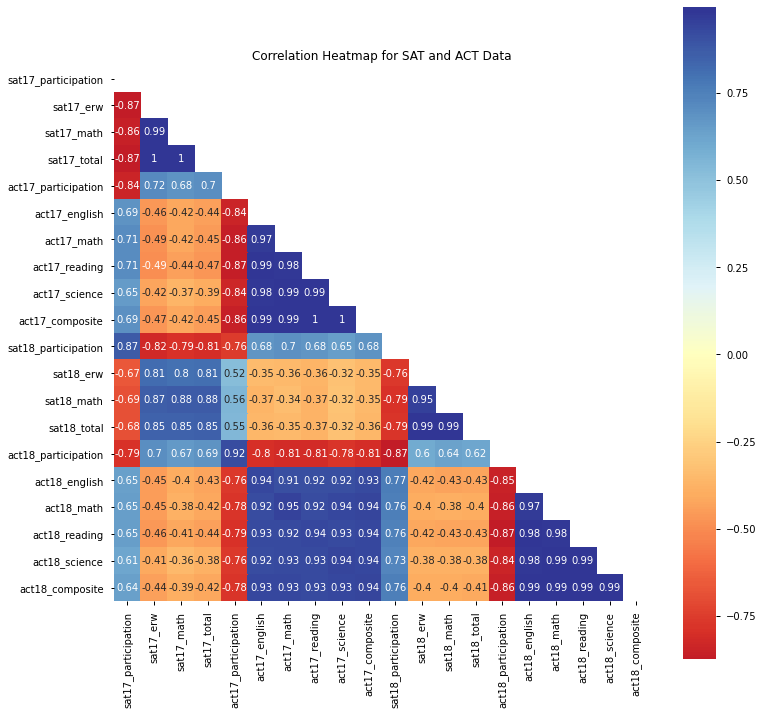

In [112]:
# Seaborn Heatmap to visualize correlation between all numeric features

fig = plt.figure(figsize=(12,12))
corr = final_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, annot=True,square=True,cmap='RdYlBu', center = 0)
ax.set_title('Correlation Heatmap for SAT and ACT Data')

# plt.savefig('../plots/corr_heatmap.png');

**Findings:**
- **Most states either participate in SAT or ACT** as the participation rates on one test is negatively correlated with the other, i.e. states with high participation in SAT will have lower participation in ACT, and vice versa (i.e. -0.84 for SAT-ACT correlation in 2017, -0.87 in 2018).
- **Participation rates on a given test are consistent year on year** correlations of participation in 2018 vs. 2017 are positively correlated (+0.87 for SAT, +0.92 in ACT).  
- **High participation states tend to have lower test scores** as the participation rates on a given test are negatively correlated with the mean scores of that test.  This is true for both SAT and ACT.
  - For example, correlation between SAT participation rate and its total score is -0.87 in 2017, and -0.79 in 2018. 
  - Similar results for the ACT, the correlation between participation rate and its composite score is -0.86 in both 2017 and 2018.
- **Subtests scores are in-line with their corresponding Total/Composite, as well as between subtests**.  Totals/composites are derived from the subtests, resulting in high correlation (0.99 or 1), and the subtests are also highly correlated with one another (>0.95) in the same test in the same year (for example correlation of ACT 2018 Math vs English is 0.97, and SAT 2017 Math vs. EWR is 0.99).  Similar patterns between subtests in different years, >0.9 for ACT, however less so for SAT between 0.8 and 0.9).  This may be a result of change in participation, or change in testing format for SAT in 2018, and requires futher research.
- **Between SAT and ACT, the scores of subtests are moderately negatively correlated (-0.3 to -.05).**  This is partly due to the opposites between participation rates of SAT/ACT, and/or there could be other factors and requires futher analysis, especially relationship of the same subject (i.e. Math) between SAT and ACT.  

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [113]:
# Defines a function to plot histograms showing comparative distributions of variables in a dataframe

def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels, 
                       figsize=(10,8), bins = 15,ncols=2,nrows=0, sharex=True, sharey=True, figtitle=None):
    """plot histograms with subplots in matplotlib"""
    if nrows == 0:
        nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=figsize, nrows=nrows, ncols=ncols, 
                           sharex=sharex, sharey=sharey) # You'll want to specify your figsize
    fig.suptitle(figtitle, fontsize=16)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=bins) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])# Set titles, labels, etc here for each subplot
        if (i >= (ncols*nrows)/2):
            ax[i].set_xlabel(list_of_xlabels[i])  # only show x labels on bottom ax plots
        if (sharey==True) and (i % ncols == 0):
            ax[i].set_ylabel(list_of_ylabels[i])  # only show y labels on left ax plots
    plt.tight_layout()
    # plt.savefig(f'../plots/{figtitle}.png');
        


In [114]:
# Same as above, with added formatting of x ticks to % for participation rates

def subplot_hist_percent(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels, 
                       figsize=(10,8), bins = 15,ncols=2,nrows=0, sharex=True, sharey=True, figtitle=None):
    """plot histograms with subplots in matplotlib for percentages with 10% bins"""
    if nrows == 0:
        nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(figsize=figsize, nrows=nrows, ncols=ncols, 
                           sharex=sharex, sharey=sharey) 
    fig.suptitle(figtitle, fontsize=16)
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        bins = [0,10,20,30,40,50,60,70,80,90,100]
        ax[i].hist(dataframe[column],bins=bins, edgecolor='lightblue') 
        ax[i].set_title(list_of_titles[i])
        if (i >= (ncols*nrows)/2):
            ax[i].set_xlabel(list_of_xlabels[i])  
            ax[i].set_xticks([0,10,20,30,40,50,60,70,80,90,100])
            ax[i].set_xticklabels(['','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
        if (sharey==True) and (i % ncols == 0):
            ax[i].set_ylabel(list_of_ylabels[i])
            ax[i].set_yticks([2,4,6,8,10,12,14,16,18,20])
    plt.tight_layout()
    # plt.savefig(f'../plots/{figtitle}.png')


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

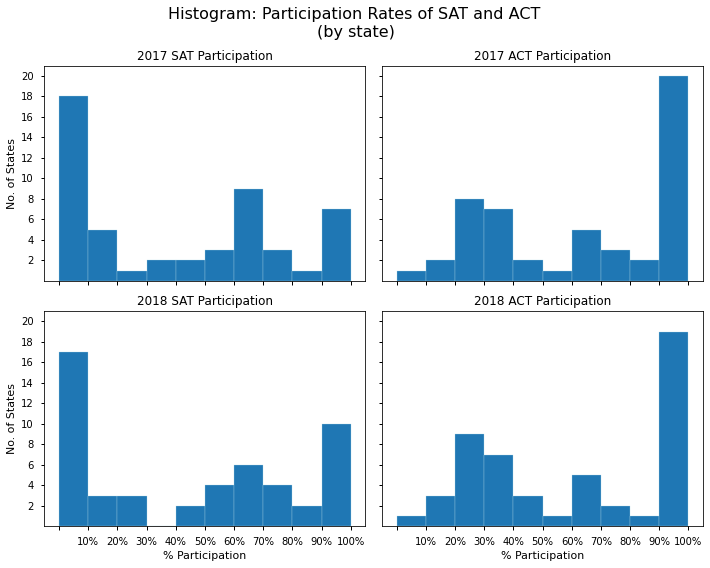

In [115]:
# Histogram for participation rates for SAT and ACT

subplot_hist_percent(
    final_df,
    ['sat17_participation','act17_participation','sat18_participation','act18_participation'],
    ['2017 SAT Participation','2017 ACT Participation', '2018 SAT Participation', '2018 ACT Participation'],
    ['% Participation','% Participation','% Participation','% Participation'],
    ['No. of States','No. of States','No. of States','No. of States'], figsize=(10,8),
    figtitle = 'Histogram: Participation Rates of SAT and ACT \n(by state)')


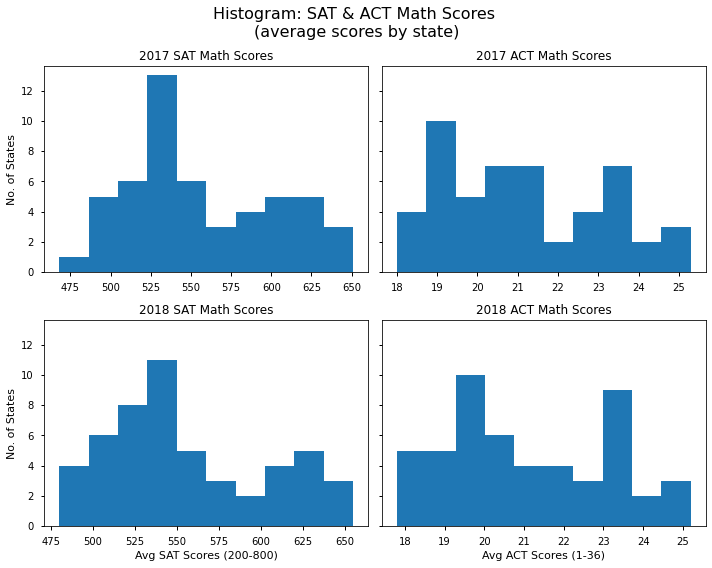

In [116]:
# Histogram for math scores for SAT and ACT

subplot_histograms(
    final_df,
    ['sat17_math','act17_math','sat18_math','act18_math'],
    ['2017 SAT Math Scores','2017 ACT Math Scores', 
     '2018 SAT Math Scores', '2018 ACT Math Scores'],
    ['Avg SAT Scores (200-800)','Avg ACT Scores (1-36)', 
     'Avg SAT Scores (200-800)','Avg ACT Scores (1-36)'],
    ['No. of States','No. of States','No. of States','No. of States'],
    figsize=(10,8), bins=10, sharex=False, 
    figtitle = 'Histogram: SAT & ACT Math Scores \n(average scores by state)')


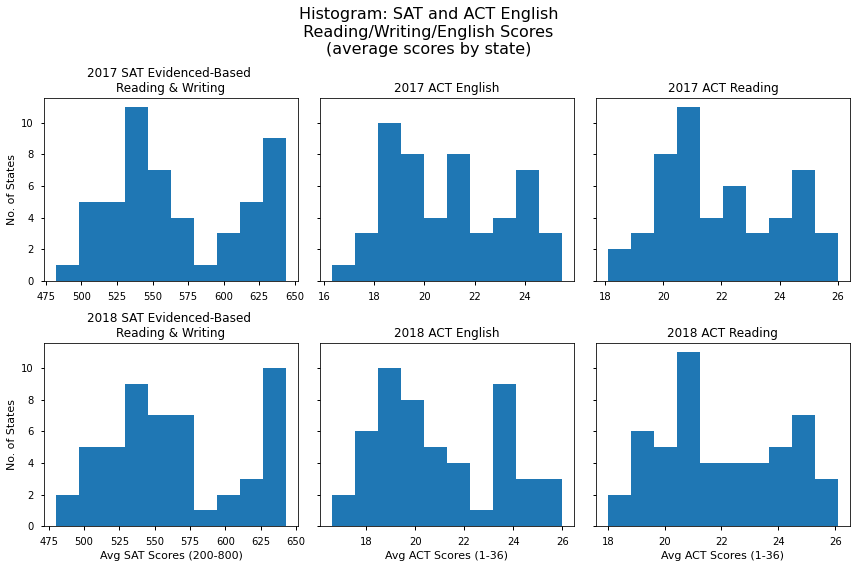

In [117]:
# Histogram for English scores for SAT and ACT

subplot_histograms(
    final_df,
    ['sat17_erw','act17_english','act17_reading',
     'sat18_erw','act18_english','act18_reading'],
    ['2017 SAT Evidenced-Based \nReading & Writing',
     '2017 ACT English', '2017 ACT Reading',
     '2018 SAT Evidenced-Based \nReading & Writing', 
     '2018 ACT English', '2018 ACT Reading'],
    ['Avg SAT Scores (200-800)','Avg ACT Scores (1-36)', 'Avg ACT Scores (1-36)', 
     'Avg SAT Scores (200-800)','Avg ACT Scores (1-36)','Avg ACT Scores (1-36)'],
    ['No. of States','No. of States','No. of States',
     'No. of States','No. of States','No. of States'
    ],figsize=(12,8), bins=10, ncols=3, nrows=2, sharex=False,
    figtitle = 'Histogram: SAT and ACT English\n Reading/Writing/English Scores \n(average scores by state)')


#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [118]:
def subplot_scatter(list_of_x, list_of_y, list_of_xlabels, list_of_ylabels, list_of_titles, 
                    nrows=0, ncols=2, figsize=(12,12), sharex=False, sharey=False, figtitle=None):
    """plot scatter plots using subplots in matplotlib"""
    if nrows == 0:
        nrows = int(len(list_of_x)/2)
    fig, ax = plt.subplots(figsize=figsize, nrows=nrows, ncols=ncols, sharex=sharex, sharey=sharey)
    fig.suptitle(figtitle, fontsize=16)
    ax = ax.ravel()
    for i, x in enumerate(list_of_x):
        ax[i].scatter(list_of_x[i],list_of_y[i],alpha=0.65, s=100);
        if (i >= (ncols*nrows)/2):
            ax[i].set_xlabel(list_of_xlabels[i])  # only show x labels on bottom ax plots
        #ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(list_of_ylabels[i])
        ax[i].set_title(list_of_titles[i])        
    plt.tight_layout()
    # plt.savefig(f'../plots/{figtitle}.png')

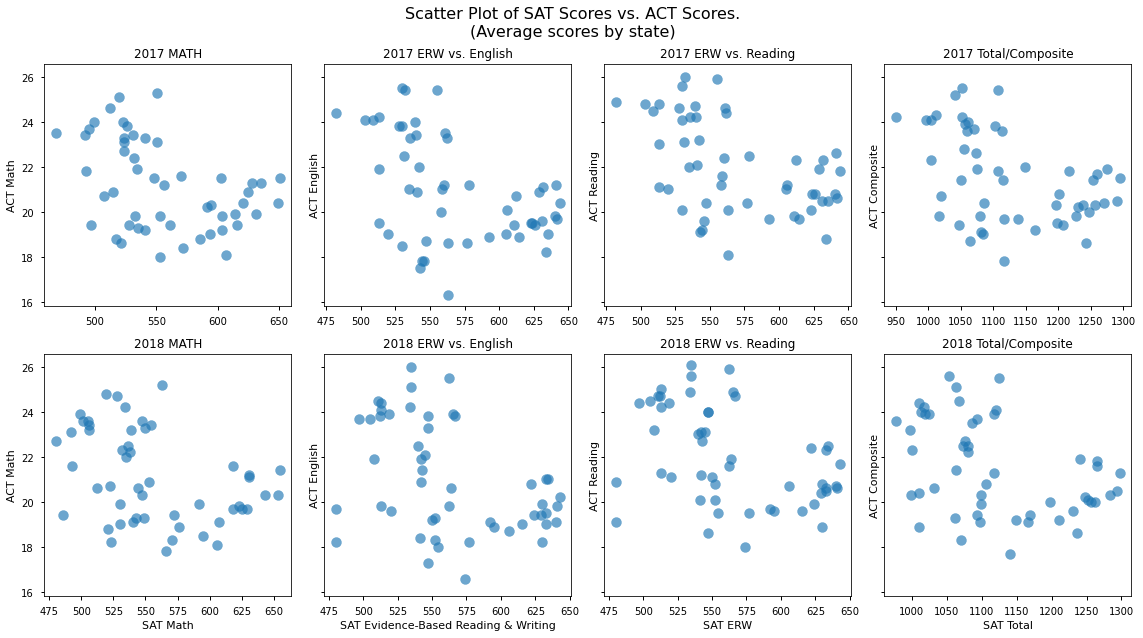

In [119]:
subplot_scatter([final_df.sat17_math, final_df.sat17_erw, final_df.sat17_erw, final_df.sat17_total,
                 final_df.sat18_math, final_df.sat18_erw, final_df.sat18_erw, final_df.sat18_total],
               [final_df.act17_math, final_df.act17_english, final_df.act17_reading, final_df.act17_composite,
                final_df.act18_math, final_df.act18_english, final_df.act18_reading, final_df.act18_composite],
                ['SAT Math', 'SAT Evidence-Based Reading & Writing', 'SAT ERW', 'SAT Total',
                 'SAT Math', 'SAT Evidence-Based Reading & Writing', 'SAT ERW', 'SAT Total'],
                ['ACT Math', 'ACT English', 'ACT Reading', 'ACT Composite',
                'ACT Math', 'ACT English', 'ACT Reading', 'ACT Composite'],
                ['2017 MATH', '2017 ERW vs. English', '2017 ERW vs. Reading', '2017 Total/Composite',
                '2018 MATH', '2018 ERW vs. English', '2018 ERW vs. Reading', '2018 Total/Composite'],
                figsize=(16,9),nrows=2,ncols=4,sharex=False, sharey=True,
               figtitle = 'Scatter Plot of SAT Scores vs. ACT Scores.\n(Average scores by state)')


The SAT and ACT scores for each section and the total/composites are negatively correlated as the dots are plotted mostly from the top left corner to bottom right corner.  However, the correlation is not high as the dots are widely scattered from each other, whereas for high correlation the dots will be closer to each other resembling a line.

In [120]:
def plot_scatter(x_column, y_column, hue, x_label, y_label, title):
    """plot single scatter plot using seaborn with hue on 3rd dimension"""
    f = plt.figure(figsize=(7,4))
    sns.scatterplot(x=x_column, y=y_column ,hue=hue)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    # plt.savefig(f'../plots/scatter_{title}.png')

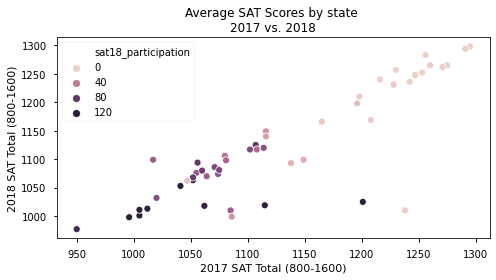

In [121]:
plot_scatter(final_df['sat17_total'], final_df['sat18_total'], final_df['sat18_participation'],
             '2017 SAT Total (800-1600)', '2018 SAT Total (800-1600)', 
             'Average SAT Scores by state \n2017 vs. 2018')

The total scores in 2017 and 2018 are positively correlated (from bottom left to top right).  The correlation is high, showing the pattern of a line.  

The hue adds 3rd dimension, which is the participation rates.  It is negatively correlated with the test scores as seen darker dots on the bottom left corner (lower values) and faded dots on the top right corner (higher values)

There are a few outliers (2 dots on the bottom right corner) with high SAT in 2017 but low in 2018.

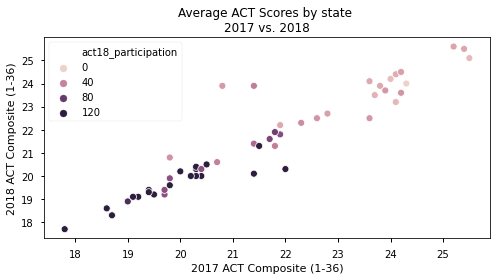

In [122]:
plot_scatter(final_df['act17_composite'], final_df['act18_composite'], final_df['act18_participation'],
             '2017 ACT Composite (1-36)', '2018 ACT Composite (1-36)', 
             'Average ACT Scores by state \n2017 vs. 2018')

Similar picture with the ACT composite scores in 2017 and 2018.  Positive correlation (from bottom left to top right), and the correlation is high, showing the pattern of a line.  

The hue adds 3rd dimension, which is the participation rates.  It is negatively correlated with the test scores as seen darker dots on the bottom left corner (lower values) and faded dots on the top right corner (higher values)


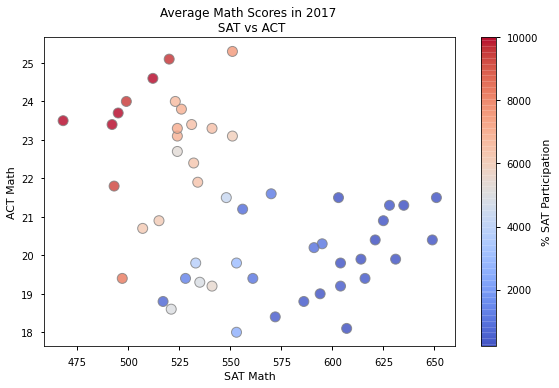

In [123]:
# Special scatter plot with 3 dimensions (size or color)

plt.scatter(final_df['sat17_math'],final_df['act17_math'],s=100,
            c=final_df['sat17_participation']*100,
            cmap='coolwarm',edgecolor='grey',linewidth=1, alpha=0.8);

cbar = plt.colorbar()
cbar.set_label('% SAT Participation')

plt.xlabel('SAT Math')
plt.ylabel('ACT Math')
plt.title('Average Math Scores in 2017 \n SAT vs ACT')

plt.tight_layout()
# plt.savefig('../plots/Scatter_Math_ACT_SAT.png')

Inverse correlation between SAT Math vs. ACT Math.  
SAT Math is also inversely correlated with SAT Participation

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

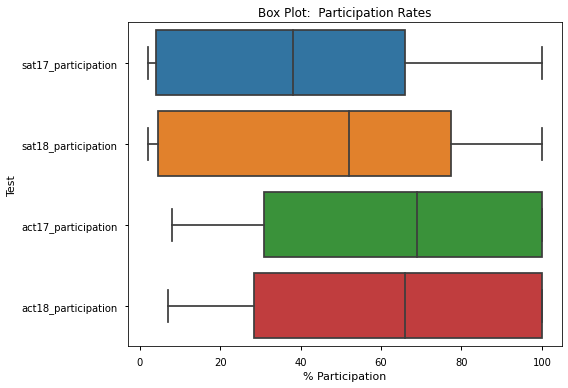

In [124]:
# Melt the data to put the different tests (sat17, sat18, act17, act18) into a variable for easy plotting on seaborn

participation_melted = pd.melt(final_df, id_vars=['state'], 
                               value_vars= ['sat17_participation', 'sat18_participation', 
                                            'act17_participation', 'act18_participation'],
                               var_name = 'test', value_name='participation')

sns.boxplot(x='participation',y='test', data=participation_melted, orient='h')
plt.title('Box Plot:  Participation Rates')
plt.xlabel('% Participation')
plt.ylabel('Test');
plt.tight_layout()
# plt.savefig('../plots/Box_Participation.png')

ACT has higher participation than SAT because:
- The Inter-quartile range (25th-75th percentile, or the horizontal length of the box) is against the max value 100%.
- The means of the ACT (solid line in the middle of the box) are also higher than that of the SAT.
- ACT participations are more consistent year on year, while the SAT has larger interquartile range as well as the mean.


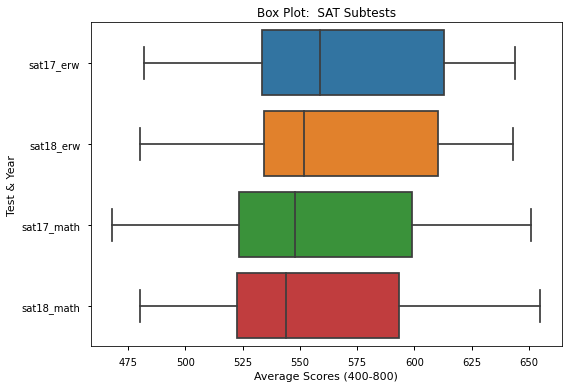

In [125]:
sat_subtest_melted = pd.melt(final_df, id_vars=['state'],
                             value_vars= ['sat17_erw', 'sat18_erw',
                                          'sat17_math', 'sat18_math'],
                             var_name = 'sat_subtest', value_name='subtest_scores')

sns.boxplot(x='subtest_scores',y='sat_subtest', data=sat_subtest_melted, orient='h');
plt.title('Box Plot:  SAT Subtests')
plt.xlabel('Average Scores (400-800)')
plt.ylabel('Test & Year');

plt.tight_layout()
# plt.savefig('../plots/Box_SAT_Subtests.png')

- The distributions of all 4 tests scores are not normally distributed, as the means are not at the center of the box (or median point).  The mean is closer to the lower end of the box.
- The interquartile ranges of the Evidence-Based Reading & Writing (ERW) is higher than the Math.  The means are slighly higher as well.  

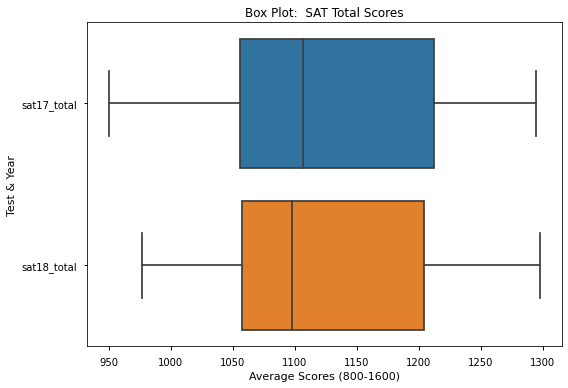

In [126]:
sat_total_melted = pd.melt(final_df, id_vars=['state'],
                           value_vars= ['sat17_total', 'sat18_total'],
                           var_name = 'sat_total', value_name='total_scores')

sns.boxplot(x='total_scores',y='sat_total', data=sat_total_melted, orient='h')
plt.title('Box Plot:  SAT Total Scores')
plt.xlabel('Average Scores (800-1600)')
plt.ylabel('Test & Year');

plt.tight_layout()
# plt.savefig('../plots/Box_SAT_Total.png');

- The distributions of the total scores are also not normally distributed.  The means (solid line inside the bar) are not at the center of the box (or median point).  The mean is closer to the lower end of the box.
- The interquartile ranges are narrow with a wide min and max values (1st and 4th quartile)

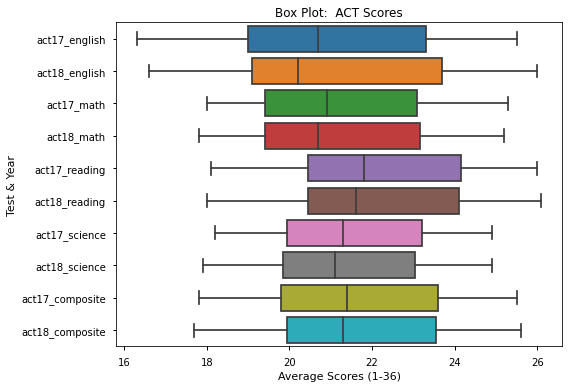

In [127]:
act_melted = pd.melt(final_df, id_vars=['state'], value_vars= [
    'act17_english', 'act18_english', 'act17_math', 'act18_math',
    'act17_reading', 'act18_reading','act17_science', 'act18_science',
    'act17_composite', 'act18_composite'], var_name = 'act', value_name='act_scores')

sns.boxplot(x='act_scores',y='act', data=act_melted, orient='h')
plt.title('Box Plot:  ACT Scores')
plt.xlabel('Average Scores (1-36)')
plt.ylabel('Test & Year')

plt.tight_layout()
# plt.savefig('../plots/Box_ACT.png');

- The distributions of all the ACT scores are also not normally distributed, with the mean closer to the lower end of the box (2nd quartile) rather than the center of the box (median).  
- Similar pattern year on year, however there are variations between the tests.
  - English has the highest spread (min-max) and the longest interquartile range, while science has the lowest.
  - Reading score is the highest of the 4 tests with the interquartile range closer to the right, and higher means.
  

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

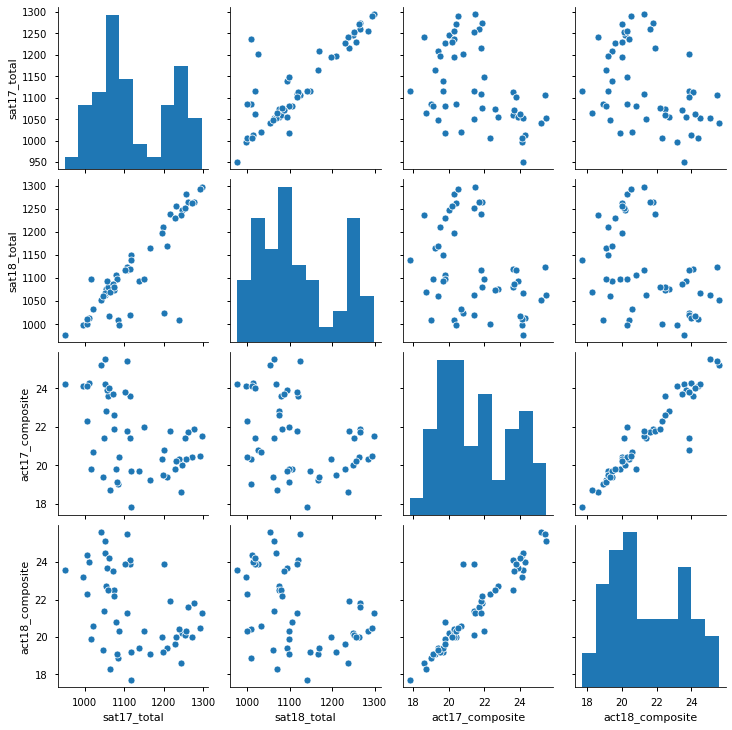

In [128]:
sns.pairplot(final_df[['sat17_total', 'sat18_total', 'act17_composite','act18_composite']])
# plt.savefig('../plots/pairplot_scores.png')

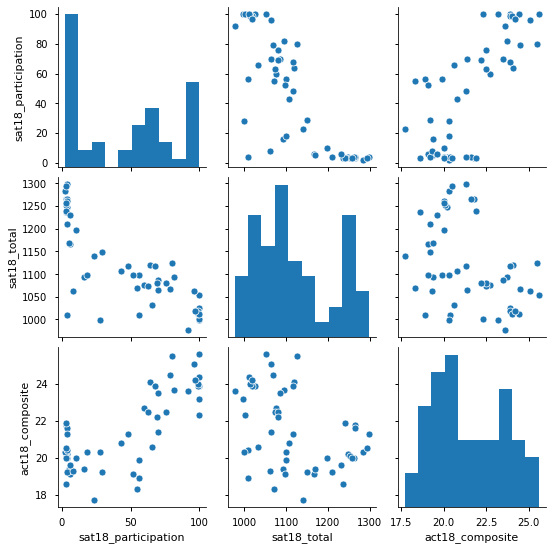

In [129]:
sns.pairplot(final_df[['sat18_participation', 'sat18_total', 'act18_composite']])

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### Distribution of Participation Rates

- **The distributions for participation rates of the SAT and ACT in both years are not symmetric (not normally distributed).** 
- **The ACT has higher state participation rates the SAT**     
  - The **mode** (peak of the distribution) for ACT is in the top bin (>90% participation), while for SAT is in the bottom bin (<10% participation).
    - ACT peak (>90%) - There are 20 states with more than 90% participation (19 states in 2018), much higher compared to the SAT with only 7 states in 2017, and increased to 10 states in 2018.
    - SAT peak (<10%) - There are 18 states with less than 10% participation (17 states in 2018), while for the ACT only 1 state falls under 10% participation.
    - Interestingly, the ACT has 100% participation rates even at 75th quantile (from `.describe`), and in the data investigation section, there are 17 states with 100% ACT participation (both 2017 and 2018).  SAT only has 4 states with 100% participation in 2017, increased to 5 states in 2018 with Colorado.     
    
  - The **means** are also higher for ACT participation with 65.3% and 61.4% (in 2017 and 2018 respectively), compared to the lower means of SAT participation rates of 39.8% and 45.7% (in 2017 and 2018 respectively).  Note the decresing trend in the means of ACT from 2017 to 2018, whereas the means for SAT participation increased.  
  - The **median** of participation rates are in line with the mean.  ACT has higher median than SAT, however with a declining trend (69% in 2017, 66% in 2018) vs. increase for SAT (38% in 2017, 52% in 2018)
    
  
- **There may be subgroups within the distribution** for both SAT and ACT.
  - Although all the 4 histograms have a distinct peak, each also has 2 smaller peaks, suggesting there could be some subgroups of the states within the data.  
    - The SAT has 3 subgroups:
      - The bottom subgroup (peak at less than 10% range) is likely to be polar opposites of the peak for ACT (>90%) as majority of the states have high participation on either SAT or ACT (only 5 states have high participation in both >50%).
      - The top subgroup (peak between 90-100%) these are states with full 100 participation on the SAT.
      - The middle subgroup (peak between 60-70%)
    - The ACT also has 3 subgroups:
      - The top subgroup (>90%)
      - The bottom subgroup (peak between 20-30%)
      - The middle subgroup (peak between 60-70%)

In [130]:
summary_stats.loc[['sat17_participation','act17_participation',
                   'sat18_participation','act18_participation'],:]

,count,mean,std,min,25%,50%,75%,max
sat17_participation,51.0,39.803922,35.276632,2.0,4.0,38.0,66.0,100.0
act17_participation,51.0,65.254902,32.140842,8.0,31.0,69.0,100.0,100.0
sat18_participation,51.0,45.745098,37.314256,2.0,4.5,52.0,77.5,100.0
act18_participation,51.0,61.647059,34.080976,7.0,28.5,66.0,100.0,100.0


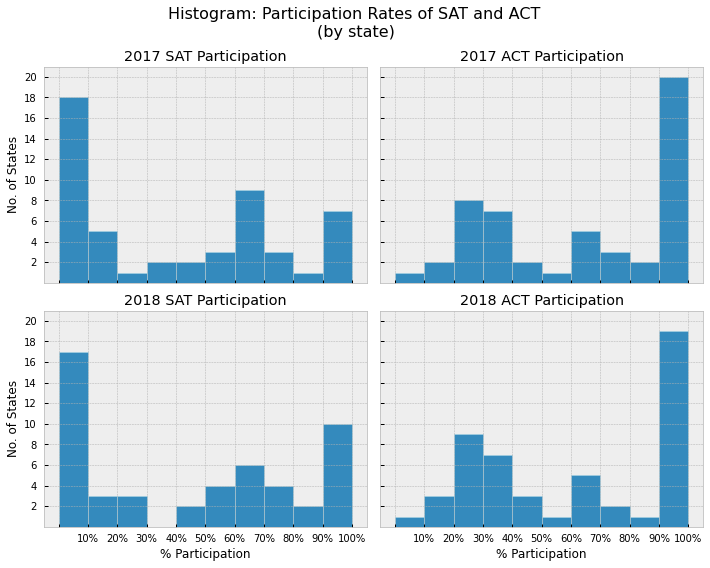

In [131]:
plt.style.use('bmh')

subplot_hist_percent(final_df,
    ['sat17_participation','act17_participation','sat18_participation','act18_participation'],
    ['2017 SAT Participation','2017 ACT Participation', '2018 SAT Participation', '2018 ACT Participation'],
    ['% Participation','% Participation','% Participation','% Participation'],
    ['No. of States','No. of States','No. of States','No. of States'],figsize=(10,8), bins=12,
    figtitle = 'Histogram: Participation Rates of SAT and ACT \n(by state)')


Text(0.5, 1.0, 'Boxplot : Participation Rates')

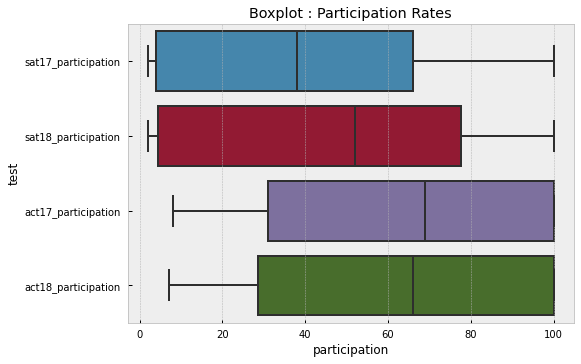

In [132]:
sns.boxplot(x='participation',y='test', data=participation_melted, orient='h');
plt.title('Boxplot : Participation Rates')

#### Distribution of Test Scores

- **The distributions of the average scores on the SAT and ACT in both years are not symmetric (not normally distributed).  This is true for the Total/Composite scores, as well as the sub-tests**


- **SAT Total vs. ACT Composite:**
  - There seems to be subgroups in the distribution for both SAT and ACT.
    - **SAT 2017:**
      - Range of data is 345 (between 950 to 1295).
      - Although the median is 1107 and mean is 1126, most of the values do not fall in these values.
      - There seems to be **2 distinct subgroups** in the data, one with a peak between 1050 and 1090 with more states having average scores in this group, and a smaller subgroup with higher scores (peak between 1230-1260) but fewer states fall into this group.  Since the distribution is not centered and there are 2 peaks, the mean of 1126 falls in the valley between the 2 peaks.
    - **ACT 2017:**
      - Range of data is 7.7 (between 17.8 to 25.5).  
      - The median is 21.4 and the mean is 21.5, however most of the values (mode or peak of the distribution) fall between 19.5 and 21.  Similar to SAT 2017, there seems to be multiple peaks (subgroups) within the data, however the data for ACT is more spread out than the SAT.
    - **SAT 2018:**
      - Similar shape as shape as SAT 2017 with 2 distinct subgroups.  Given 2 subgroups, the mode is also representative of the main subgroup (lower scores), hence the mode is lower than the mean and median with is representative of the data (both subgroups).       
    - **ACT 2018:**
      - Similar shape, central tendency, and spread as ACT2017.


- **SAT/ACT Subtests:**
  - In line with the Total/Composite scores, the subtests have similar pattern of multiple peaks where the main peak (mode) is lower than the mean and median scores.  On some tests, the multiple peaks have closer peak points (bi-modal distribution), i.e. ACT Math, SAT Reading and Writing.
  - **SAT Subtests:**
    - Evidenced-Based Reading and Writing (ERW) has bi-modal distribution shape with 2 peaks points, one between 525 and 550, and the other between 625-650, each group consisting of ~10 states.  
    - Math also has 2 peaks, however with only 1 mode (525-550) most states fall in this group, which is lower than the mean 556 and median 548.  
    - Lower SAT scores on Math than ERW as seen in the area of the Math plots are thicker on the left side, while ERW is more on the right side with 2nd peak on higher score. This matches the corresponding means (556 for Math, 569 for ERW), and inter-quartile ranges 523-299 for Math, 533-613 for ERW. 
  - **ACT Subtests:**
    - All subtests have a pattern of 2 subgroups, while Math and English seems to have bi-modal or multi-modal shape with 2 or more peak points at the same height, especially in 2018.  Between subgroups, the gap seems to be between scores 22 and 23.
    - English has the widest spread with the minimum of 16.3 vs. 18 for other subtests, with higher peak points that other subtests which seems more flat.  This is in line with Std Dev, which is 2.4 vs. less than 2 for other subtests.
    - Reading and Science have more flat distribution.  Reading distribution has less area on the left, hence indicating central tendencies at higher score.  This is in line with interquantile range of 20.45 to 24.5 for Reading, vs. other subtests (19.95-23.2 for Science, 19.4-23.1 for Math, 19-23.3 for English.  


In [133]:
summary_stats.loc[['sat17_total','act17_composite',
                   'sat18_total','act18_composite'],:]

,count,mean,std,min,25%,50%,75%,max
sat17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act17_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat18_total,51.0,1120.019608,94.155083,977.0,1057.50,1098.0,1204.00,1298.0
act18_composite,51.0,21.486275,2.106278,17.7,19.95,21.3,23.55,25.6


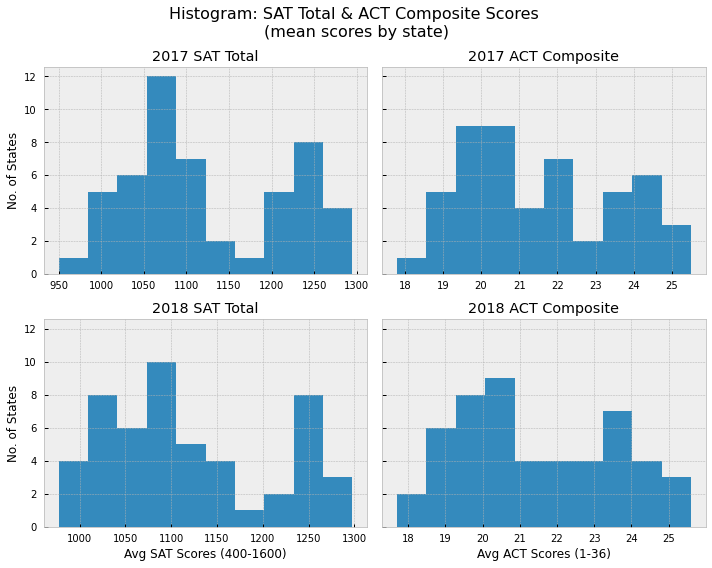

In [134]:
subplot_histograms(
    final_df,
    ['sat17_total','act17_composite','sat18_total','act18_composite'],
    ['2017 SAT Total','2017 ACT Composite','2018 SAT Total','2018 ACT Composite'],
    ['Avg SAT Scores (400-1600)','Avg ACT Scores (1-36)', 
     'Avg SAT Scores (400-1600)','Avg ACT Scores (1-36)'],
    ['No. of States','No. of States','No. of States',
     'No. of States'],figsize=(10,8), bins=10, sharex=False,
    figtitle = 'Histogram: SAT Total & ACT Composite Scores \n(mean scores by state)')


In [135]:
summary_stats.loc[['sat17_erw', 'sat17_math','sat18_erw','sat18_math', 
                   'act17_english', 'act17_math', 'act17_reading','act17_science',
                   'act18_english','act18_math', 'act18_reading', 'act18_science']]

,count,mean,std,min,25%,50%,75%,max
sat17_erw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat18_erw,51.0,563.686275,47.502627,480.0,534.50,552.0,610.50,643.0
sat18_math,51.0,556.235294,47.772623,480.0,522.50,544.0,593.50,655.0
act17_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act17_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act17_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act18_english,51.0,20.988235,2.446356,16.6,19.10,20.2,23.70,26.0
act18_math,51.0,21.125490,2.035765,17.8,19.40,20.7,23.15,25.2


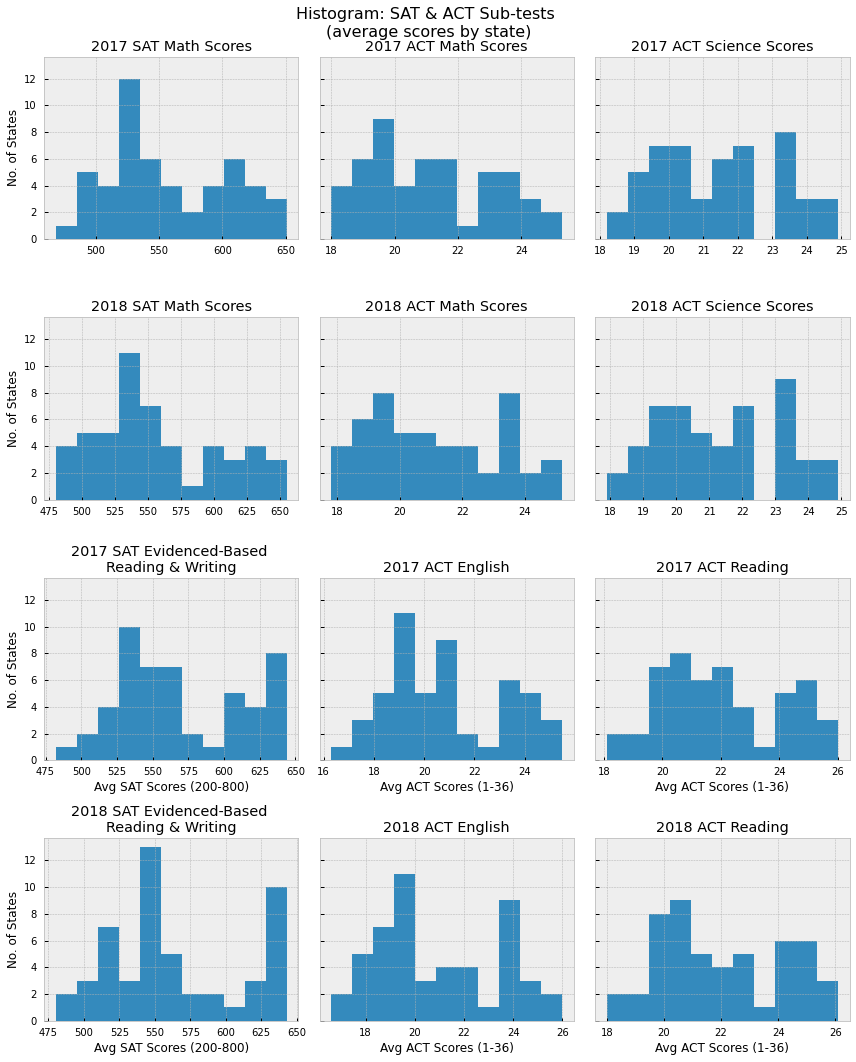

In [136]:
subplot_histograms(
    final_df,
    ['sat17_math','act17_math','act17_science','sat18_math','act18_math', 'act18_science',
    'sat17_erw','act17_english','act17_reading','sat18_erw','act18_english','act18_reading'],
    ['2017 SAT Math Scores','2017 ACT Math Scores','2017 ACT Science Scores', 
     '2018 SAT Math Scores', '2018 ACT Math Scores','2018 ACT Science Scores',
     '2017 SAT Evidenced-Based \nReading & Writing','2017 ACT English', '2017 ACT Reading',
     '2018 SAT Evidenced-Based \nReading & Writing', '2018 ACT English', '2018 ACT Reading'],
    ['Avg SAT Scores (200-800)','Avg ACT Scores (1-36)','Avg ACT Scores (1-36)', 
     'Avg SAT Scores (200-800)','Avg ACT Scores (1-36)','Avg ACT Scores (1-36)',
    'Avg SAT Scores (200-800)','Avg ACT Scores (1-36)', 'Avg ACT Scores (1-36)', 
     'Avg SAT Scores (200-800)','Avg ACT Scores (1-36)','Avg ACT Scores (1-36)'],
    ['No. of States','No. of States','No. of States','No. of States', 
     'No. of States','No. of States','No. of States','No. of States','No. of States',
     'No. of States','No. of States','No. of States'],
    figsize=(12,15), bins=11, ncols=3, nrows=4, sharex=False,
    figtitle = 'Histogram: SAT & ACT Sub-tests \n(average scores by state)')




#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

**Answer:**

We did not observe this trend, and the distribution of all the state means are not normally distributed.  The state means are not randomly selected, and are not independent of each other (i.e. SAT participation impacts ACT participation, and both influence the test scores).

We will not be able to use central limit theorem (CLT) in this case because the sample means drawn from the 51 samples representing each 51 states, and heance are not randomly selected will not be representative of the population mean (nationwide average).

However, if we have a different set of 51 samples randomly drawn from students who take this test nation-wide, and each sample has scores from at least 30 students (n=30), we can assume that the distribution of the sample means will be normally distributed, although the distribution of the sample itself (i.e. ACT math test) is not normally distributed, based on CLT.

With sampling distribution of the means, we can calculate the standard deviation (standard error), which can be used to calculate the confidence intervals when making inferences to the population parameters.


Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

**Answer:**

Yes the answer above holds true for the test scores (Math, Reading, etc), as well as the rates.

- Using the test scores from the 51 states to make inferences to nationwide score will be biased because it is assuming that the 51 states are similar (i.e. number of test takers for each state, same SAT/ACT participation rates, same profiles of test takers, etc.) and equally representative of the population, which in fact is not.
 
  - **The participation rates:**  
    - Estimate nationwide participation will be **understated for the SAT** given low participation at state level, however among the biggest states in the US (i.e. California, Texas, Florida, New York, Pensylvanie), the participation rates are high, which will not be taken into account.  Similarly the estimate **for ACT will be overstated** given the high numbers of states with 100% participation however they may be smaller in population.
  - **Math & Reading:**
    - The scores are negatively correlated with the participation rates, so the estimates will be **overstated for SAT and understated for ACT.** 


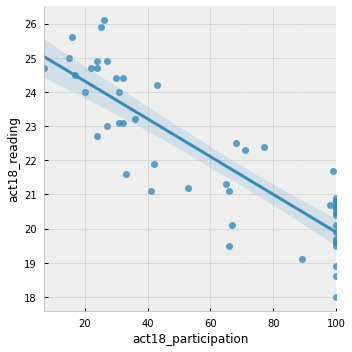

In [137]:
sns.lmplot(x='act18_participation',y='act18_reading',data=final_df);

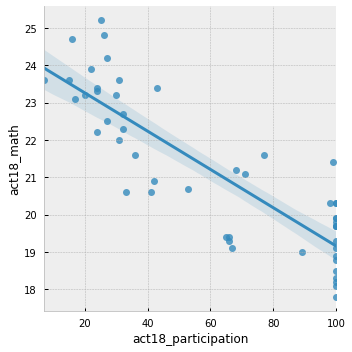

In [138]:
sns.lmplot(x='act18_participation',y='act18_math',data=final_df);

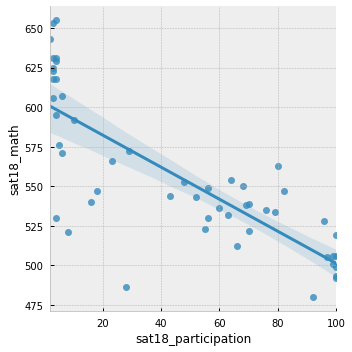

In [139]:
sns.lmplot(x='sat18_participation',y='sat18_math',data=final_df);

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

**Answer:**

This data set provides understanding of the relationship between SAT and ACT participation rates in 2017 **at state level**.  However, to make inferences to the relationship between SAT and ACT participation nationwide, this data have the following limitations:

It does not take into account the size of each state, more specifically the number of test takers for each state.  I.e. the samples need to have more data from the states with higher number of test takers, and less from smaller states, in other words, the sample composition needs to be representative of the population.


##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

**Answer:**

It is not appropriate to compare the specific SAT and ACT math scores as not only they are in different scales, there are also other multiple differentiating factors:

- Time:  Less time for ACT
- Calculator:  Allowed for ACT, but only some parts of SAT
- Reference Sheet:  Yes for SAT, No for ACT (requires recalling skills/information)
- Multiple Choice:  Yes for ACT, Combination with grid questions for SAT

Therefore, it is not conclusive whether a student with higher SAT math score is actually better than those with ACT scores, or vice versa.  The higher score could be a result of other factors.


(source: https://blog.collegevine.com/difference-sat-act-math/#:~:text=Math%20is%20the%20second%20section,ve%20learned%20in%20high%20school.)

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

**Answer:**

We cannot conduct Hypothesis Testing in this case because the statistics (mean, std dev) are not on comparable scale.


In [140]:
summary_stats.loc[['sat17_math','sat18_math', 'act17_math','act18_math']]

,count,mean,std,min,25%,50%,75%,max
sat17_math,51.0,556.882353,47.121395,468.0,523.5,548.0,599.00,651.0
sat18_math,51.0,556.235294,47.772623,480.0,522.5,544.0,593.50,655.0
act17_math,51.0,21.182353,1.981989,18.0,19.4,20.9,23.10,25.3
act18_math,51.0,21.125490,2.035765,17.8,19.4,20.7,23.15,25.2


## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

**3 States of interesting rates are:**
- Iowa, South Dakota, Kansas


**Rationale:** 
  - As College Board employee looking to improve the SAT participation rates, the variable of interst is the participation rates of SAT.  We look at the most recent year 2018, and sort from the lowest value.
  - The states where ACT participation rates are 100% are likely to be ACT mandatory states and more difficult to convert.
  - Hence, the key focus are the 3 states with lowest SAT participations where the ACT scores are less than 90%


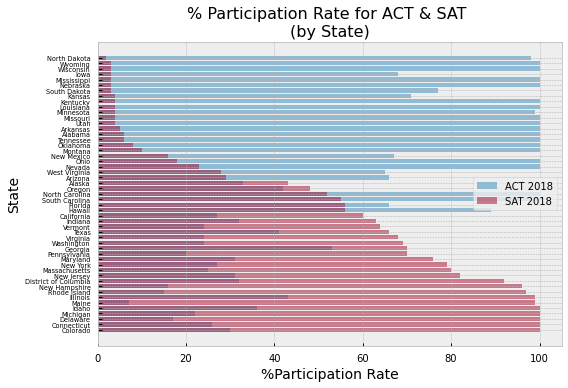

In [141]:
sorted_participations = final_df[['state','sat18_participation','act18_participation']
        ].sort_values('sat18_participation', ascending=False)

plt.figsize=(30,20)  # try to make the chart bigger
plt.barh(sorted_participations.state, sorted_participations.act18_participation, label = 'ACT 2018', alpha=0.5)
plt.barh(sorted_participations.state, sorted_participations.sat18_participation, label = 'SAT 2018', alpha=0.5)

plt.legend()

plt.title("% Participation Rate for ACT & SAT \n(by State)", fontsize=16) 

plt.xlabel("%Participation Rate", fontsize=14) 
plt.ylabel("State",fontsize=14) 

plt.tick_params(axis='y', which='major', labelsize=6.5)
plt.tight_layout()

# plt.savefig('../plots/participation_by_state.png')

This plot shows % of SAT participations (in red) vs. ACT (in blue).  
Sorted with lowest SAT participation rates on top.   


In [142]:
# Filter states based on lowest SAT participation rates, where ACT participation rates are still below 90%
# Sort by lowest SAT participation.

final_df.loc[((final_df['sat18_participation'] < final_df['sat18_participation'].quantile(0.5))) &                  
     (final_df['act18_participation'] < 90),
             ['state','sat18_participation','act18_participation']
            ].sort_values('sat18_participation',ascending=True)

,state,sat18_participation,act18_participation
15,Iowa,3.0,68.0
41,South Dakota,3.0,77.0
16,Kansas,4.0,71.0
31,New Mexico,16.0,67.0
48,West Virginia,28.0,65.0
2,Arizona,29.0,66.0
1,Alaska,43.0,33.0
37,Oregon,48.0,42.0


### Key Findings from outside research

**SAT reclaims leadership in college admission test in 2018 (after losing to ACT in 2012).  State contracts proven effective to increase participation rates as seen in Colorado and Illinois.**  

- SAT increased participation rates by revising the test and entering into deals with numerous states and school systems to give students the exam. **New contracts with Colorado and Illinois were instrumental in the SAT’s growth.**  This is in line with our data investigations.  

- Within the past decade, the testing landscape has evolved rapidly as many states have opted to pay the ACT or College Board **(SAT School Day Program)** to deliver exams during school hours. Students can take those versions free of charge, where available, or they can pay to take the tests on the weekends.

- For Colorado, SAT replaced ACT as a result of new legislation (House Bill 15-1323) requiring the Department of Education to take competitive bids for both a college-entrance exam and a new exam for 10th-graders.  College Board won the bid against ACT, and awarded a 5-year contract.  Previously, ACT has been given in Colorado since 2001.  Source: https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/#:~:text=The%20SAT%20is%20replacing%20the,new%20exam%20for%2010th%2Dgraders. https://co.chalkbeat.org/2015/12/23/21092477/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers https://www.cde.state.co.us/communications/11thand10thgradeexams

- In Illinois, SAT also replaced ACT as its state contract ended in 2016, despite having been popular for the past 15 years.
coto allow competitive bidding, where College Board SAT won over ACT which had been admistered in Colorado since 2001. 
https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html

- The trend of state contracts will continue.  Currently ACT has 17 state contracts, SAT has 8, with the total of 25 states nationwide, and expecting others to join.  (Source: https://www.applerouth.com/blog/2016/01/13/how-the-sat-got-its-groove-back/)  

- Benefits of State Contract: https://collegereadiness.collegeboard.org/sat/k12-educators/sat-school-day/contracts



## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

## Conclusions:

**Out of the 3 states of interest, IOWA has the highest potential.**

- **Highest population among the 3 states.**  Gaining state participation in Iowa (3.96 Million Population) will have higher impact on the National average particiation.  Second priority is Kansas (2.9 Million), while South Dakota is as smaller opportunity (884 Thousand).

- **Opportunity to replace the current state assessment tests.**. 
  - All 3 states are using non SAT/ACT for high school tests, providing an opportunity for SAT.  For students looking to apply for college, switching to SAT will take the burden of their time to prepare for college admissions, while also encouraging those who may not consider apply for college to do so given less barrier on time and resources (as seen in the case of Illinois).
  - Greater opportunity for Iowa and Kansas as they are currently using local tests (Iowa State-wide Assessment - ISASP) and Kansas Assessment Program - KAP, while South Dakota is currently using Smarter Balanced, a standardized high school test used in many states, i.e. California, Connecticut).
  - Source: https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html
  
- **Additional research show supporting information for Iowa.**
  - **Relatively stronger financials vs. Kansas:** With higher tax revenue (USD 9.5 vs. 8 Billion), higher (USD 6 vs. 3.9 Billion), and relatively lower debt USD 6.12 Billion in fiscal year 2015 (ranked 37th among the states in debt).  (Source: https://ballotpedia.org/Iowa_state_budget_and_finances)
  - **Focus on education:** Education accounted for 41.6 percent of state expenditures in fiscal year 2015.
  - **Need for change with support from legislators:**
    - Based on the article Money is the key to education in Iowa, there is a sentiment around need for a change for Iowa regarding measures of education success for students, while the main constraint is money.  Iowa is ranked 25th in per-pupil spending (USD 13,531 vs. USD 14,273 National Average).  Fortunately, some advocates and legislators continue to push for higher funding.  Last session, the Iowa Legislature also increased funding by 2.1%.
    - A few quotes that implies "need for change":
      - "Iowa has lost its leadership position in national rankings," 
      - In recent years, some of the stats that have come to define educational success have changed, and not always for the better. Sometimes those numbers haven't changed, but other states have made gains that Iowa students aren't necessarily seeing. 
      - Source: Article: Money is the key to education in Iowa https://qctimes.com/news/local/education/the-numbers-money-is-the-key-to-education-in-iowa/article_1d1578dc-0050-5814-91f7-ef3a74da739d.html

  

**Prioritized list of states with high opportunity to target**


|Priority|State|2018 SAT Participation|Population|Current High School Test|
|---|---|---|---|---|
|1|**Iowa**|3%|3,962,077|Iowa State-wide Assessment(ISASP)|
|2|**Kansas**|4%|2,913,314|Kansas Assessment Program. (KAP)|
|3|**South Dakota**|3%|884,659|Smarter Balanced (standardized test)|

Sources: (State Population)
https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population


## Recommendations:

**Adopt same strategy as for Colorado & Illinois with State Contracts (SAT School Day Program), focusing on Iowa, followed by Kansas.**  This may require changes in legislation for the particular state to allow competitive bidding.  
  
**Key message to convince legislators & Department of Education:**
  - Redirecting the funds spent on local high school tests to state-funded SAT will release the state's resources to on other matters, while ensuring that student's measurement of academic success is achieved and competitive with other states nationwide.
  - For parents and students, this will benefit students who are applying for college by putting less time and burden on preparing for standardized tests, while also benefiting those who previously were not planning to apply for college by increasing their readiness and affordability as the test will be state-funded.
  
